In [52]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [6]:
m0 = 355
x = 357
s = 93.52   # example standard deviation
n = 95
alpha = 0.1

# t-statistic formula
t_stat = (x - m0) / (s / np.sqrt(n))

# degrees of freedom
dof = n - 1

# two-tailed p-value
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=dof))

print('t_statistic =', t_stat)
print('p_value =', p_value)

t_statistic = 0.2084429928316716
p_value = 0.8353340853753775


In [12]:
m0 = 300
x = 289.3
s = 93.52   # example standard deviation
n = 95
alpha = 0.1

# t-statistic formula
t_stat = (x - m0) / (s / np.sqrt(n))

# degrees of freedom
dof = n - 1

# two-tailed p-value using survival function (no subtraction from 1)
p_value = 2 * stats.t.sf(abs(t_stat), df=dof)

print('t_statistic =', t_stat)
print('p_value =', p_value)

t_statistic = -1.1151700116494419
p_value = 0.2676205064863819


In [13]:
s / np.sqrt(n)

np.float64(9.594949548700361)

## Hypothesis test excel Maven

In [28]:
n = 95.0
s = 6.17
alpha = 0.2
x = 80.2
m0 = 80.0
df = n - 1
t = (x - m0) / (s / np.sqrt(n))

In [29]:
print(t)

0.31594146984794497


In [46]:
p_value = 2.0 * (stats.t.sf(t, df= df))

In [38]:
print(p_value)

0.752747377732773


In [39]:
p_value > alpha

np.True_

In [40]:
std = s / np.sqrt(n)

In [41]:
print(std)

0.6330286432365401


In [42]:
test_t = (x-m0)/std

In [43]:
print(test_t)

0.31594146984794497


In [49]:
stats.t.interval(0.8,df=n-1,loc=x,scale=s/np.sqrt(n))

(np.float64(79.38299885820003), np.float64(81.01700114179998))

## Visual 3 types of hypothesis tests

In [54]:
def compare_tailed_ttests(data, popmean, alpha=0.05):
    t_stat, p_val_two = stats.ttest_1samp(data, popmean)
    df = len(data) - 1

    # Critical values
    t_crit_two = stats.t.ppf(1 - alpha/2, df)
    t_crit_left = stats.t.ppf(alpha, df)
    t_crit_right = stats.t.ppf(1 - alpha, df)

    # p-values
    p_left = p_val_two / 2 if t_stat < 0 else 1 - (p_val_two / 2)
    p_right = p_val_two / 2 if t_stat > 0 else 1 - (p_val_two / 2)
    p_two = p_val_two

    # X values for t-distribution
    x = np.linspace(-4, 4, 400)
    y = stats.t.pdf(x, df)

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # --- Two-tailed ---
    axes[0].plot(x, y, 'b')
    axes[0].fill_between(x, y, where=(x <= -t_crit_two) | (x >= t_crit_two), color='red', alpha=0.3)
    axes[0].axvline(t_stat, color='green', linestyle='--', label=f't = {t_stat:.2f}')
    axes[0].set_title("Two-tailed test")
    axes[0].legend()

    # --- Left-tailed ---
    axes[1].plot(x, y, 'b')
    axes[1].fill_between(x, y, where=(x <= t_crit_left), color='red', alpha=0.3)
    axes[1].axvline(t_stat, color='green', linestyle='--', label=f't = {t_stat:.2f}')
    axes[1].set_title("Left-tailed test")
    axes[1].legend()

    # --- Right-tailed ---
    axes[2].plot(x, y, 'b')
    axes[2].fill_between(x, y, where=(x >= t_crit_right), color='red', alpha=0.3)
    axes[2].axvline(t_stat, color='green', linestyle='--', label=f't = {t_stat:.2f}')
    axes[2].set_title("Right-tailed test")
    axes[2].legend()

    plt.suptitle("Comparison of Two-Tailed, Left-Tailed, and Right-Tailed t-tests", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    # Results
    results = {
        "Two-tailed": {"t-statistic": t_stat, "p-value": p_two, "alpha": alpha, "Conclusion": "Reject H₀" if p_two < alpha else "Fail to Reject H₀"},
        "Left-tailed": {"t-statistic": t_stat, "p-value": p_left, "alpha": alpha,"Conclusion": "Reject H₀" if (p_left < alpha and t_stat < 0) else "Fail to Reject H₀"},
        "Right-tailed": {"t-statistic": t_stat, "p-value": p_right, "alpha": alpha,"Conclusion": "Reject H₀" if (p_right < alpha and t_stat > 0) else "Fail to Reject H₀"},
    }

    return results

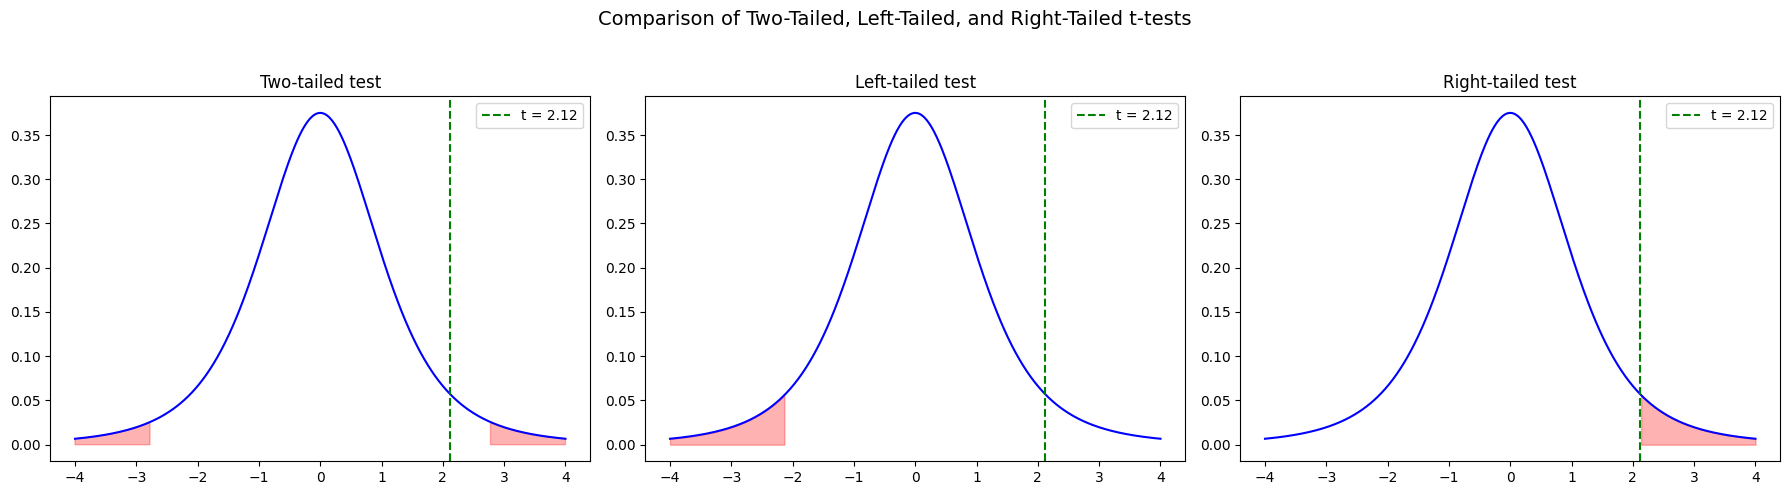


Two-tailed Test:
  t-statistic: 2.121320343559641
  p-value: 0.1011915072182956
  alpha: 0.05
  Conclusion: Fail to Reject H₀

Left-tailed Test:
  t-statistic: 2.121320343559641
  p-value: 0.9494042463908522
  alpha: 0.05
  Conclusion: Fail to Reject H₀

Right-tailed Test:
  t-statistic: 2.121320343559641
  p-value: 0.0505957536091478
  alpha: 0.05
  Conclusion: Fail to Reject H₀


In [55]:
data = [2.1, 2.5, 1.9, 2.3, 2.7]
popmean = 2

results = compare_tailed_ttests(data, popmean)
for test_type, outcome in results.items():
    print(f"\n{test_type} Test:")
    for key, value in outcome.items():
        print(f"  {key}: {value}")

## EXCEL MAVEN ASSIGNMENT (Hypothesis Test p)

In [64]:
n=53
p=0.6415
p0 = 0.5
confidence = 0.95
alpha = 1-confidence


In [62]:
SE = np.sqrt(p*(1-p)/n)
print(SE)

0.06587262580305023


In [60]:
z_crit = stats.norm.ppf(1-alpha/2)
print(z_crit)

1.2815515655446004


In [61]:
margin = z_crit * SE
print(margin)

0.08441916672443266


In [65]:
Z = (p-p0) / SE

In [67]:
print(Z)

2.1480850091366452


In [68]:

# two-tailed p-value
p_value = 2 * (1 - stats.norm.cdf(abs(Z)))

In [69]:
print(p_value)

0.03170700288495332


In [70]:
p_value < alpha

np.True_